<a href="https://colab.research.google.com/github/L-ansari/DeepLearning/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#reading in the policy data of countries
import pandas as pd

c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)

"merging all the above 8 dataframes into 1"
frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]
result = pd.concat(frames)
print( result.shape)

number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(1488, 564)


In [ ]:
#extracting restrinction policy scores of 8 policies for 5 different countries 
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]



#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )

deutch_policy.loc["Row_Total"] = deutch_policy.sum()
hungary_policy.loc["Row_Total"] = hungary_policy.sum()
italy_policy.loc["Row_Total"] = italy_policy.sum()
poland_policy.loc["Row_Total"] = poland_policy.sum()
sweden_policy.loc["Row_Total"] =sweden_policy.sum()



number of policies & number of days is 8 , 562


/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Germany

In [ ]:


#extract the germany policy column 



deutch_policy_transposed =deutch_policy.T 
deutch_policy_transposed.reset_index(inplace=True)
deutch_policy_transposed.dtypes

deutch_policy_transposed = deutch_policy_transposed.drop(labels=0, axis=0)
deutch_policy_transposed.rename(columns=deutch_policy_transposed.iloc[0])
#drop the first row
deutch_policy_transposed=deutch_policy_transposed.iloc[1:,:]

#headers = deutch_policy_transposed.iloc[0]
#deutch_policy_transposed  = pd.DataFrame(deutch_policy_transposed.values[1:], columns=headers)

deutch_policy_transposed_FirstLastWeekDropped=deutch_policy_transposed.iloc[4:361,:]


#preparing the independent variable
policy_2020_total_deutch=deutch_policy_transposed_FirstLastWeekDropped.iloc[:,9]
weekly_policy_2020_deutch=policy_2020_total_deutch.groupby(policy_2020_total_deutch.index // 7).sum()
#average weekly independent variable
weekly_policy_2020_deutch=weekly_policy_2020_deutch/7

#normalized independent variable
normalized_weekly_policy_2020_deutch=(weekly_policy_2020_deutch-weekly_policy_2020_deutch.min())/(weekly_policy_2020_deutch.max()-weekly_policy_2020_deutch.min())



## Reading in the editorship data

In [ ]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [ ]:

#making up the datetime structure 
revs_deutch['dateInt']=revs_deutch['y'].astype(str) + revs_deutch['m'].astype(str).str.zfill(2)+ revs_deutch['d'].astype(str).str.zfill(2)
revs_deutch['Date'] = pd.to_datetime(revs_deutch['dateInt'], format='%Y%m%d')      
revs_deutch = revs_deutch.reset_index()




revs_deutch_2019=revs_deutch.loc[(revs_deutch['Date'] >= '2018-12-30 00:00:00') & (revs_deutch['Date'] < '2020-01-01 00:00:00')]
revs_deutch_2020=revs_deutch.loc[(revs_deutch['Date'] >= '2019-12-29 00:00:00') & (revs_deutch['Date'] < '2021-01-01 00:00:00')]


revs_deutch_2019 = revs_deutch_2019.reset_index()
revs_deutch_2020 = revs_deutch_2020.reset_index()

del revs_deutch_2019['index']
del revs_deutch_2020['index']

del revs_deutch_2019['level_0']
del revs_deutch_2020['level_0']


#drop the first week of 2019 (up to 6th of 2019)
#Drop the first and last columns of 2019 and 2020

revs_deutch_2019_FirstLastweekdroped=revs_deutch_2019.loc[(revs_deutch_2019['Date'] >= '2018-12-30 00:00:00') & (revs_deutch_2019['Date'] < '2019-12-29 00:00:00')]
revs_deutch_2020_FirstLastweekdroped=revs_deutch_2020.loc[(revs_deutch_2020['Date'] >= '2019-12-29 00:00:00') & (revs_deutch_2020['Date'] < '2020-12-27 00:00:00')]


In [ ]:

#Now we make up the daily ratios  (24*7= 168) per week for 2019

#test
#print(revs_deutch_2019_FirstLastweekdroped.iloc[0,4])
hourly_deutch_FirstLastweekdroped_2019=revs_deutch_2019_FirstLastweekdroped.iloc[:,4]
hourly_deutch_FirstLastweekdroped_2019 = hourly_deutch_FirstLastweekdroped_2019.reset_index()

#group by and sum up every 168 cell (revision counts in 168 cells --->this we later use to devide daily counts and get daily ratios)
weekly_sum_2019=hourly_deutch_FirstLastweekdroped_2019.groupby(hourly_deutch_FirstLastweekdroped_2019.index // 168).sum()



last_check = 0
dfs = []
multiples_of_168=  [i for i in range (365*24) if i%168 == 0]


for i in range (len(multiples_of_168)-1) :
    dfs.append(revs_deutch_2019_FirstLastweekdroped.iloc[multiples_of_168[i]:multiples_of_168[i+1]  ,:].reset_index())
    #last_check = ind
    
extracted_daily_2019=[]
    
for i in range (len(dfs)):
    
    extracted_daily_2019.append(dfs[i].iloc[:,5])
    

weekly_sum_2019_list=weekly_sum_2019['c'].tolist()

    
extracted_daily_ratio_2019=[]
for i in range (len(extracted_daily_2019)):
    extracted_daily_ratio_2019.append(extracted_daily_2019[i]/weekly_sum_2019_list[i])
    

In [ ]:
#Now we make up the daily ratios  (24*7= 168) per week for 2020

#print(revs_deutch_2019_FirstLastweekdroped.iloc[0,4])
hourly_deutch_FirstLastweekdroped_2020=revs_deutch_2020_FirstLastweekdroped.iloc[:,4]
hourly_deutch_FirstLastweekdroped_2020 = hourly_deutch_FirstLastweekdroped_2020.reset_index()

#group by and sum up every 24 cell (revision counts in 24 hours)
weekly_sum_2020=hourly_deutch_FirstLastweekdroped_2020.groupby(hourly_deutch_FirstLastweekdroped_2020.index // 168).sum()



last_check = 0
dffs = []
multiples_of_168=  [i for i in range (365*24) if i%168 == 0]


for i in range (len(multiples_of_168)-1) :
    dffs.append(revs_deutch_2020_FirstLastweekdroped.iloc[multiples_of_168[i]:multiples_of_168[i+1]  ,:].reset_index())
    #last_check = ind
    
extracted_daily_2020=[]
    
for i in range (len(dffs)):
    
    extracted_daily_2020.append(dffs[i].iloc[:,5])
#del extracted_daily_2020[-1]
    

weekly_sum_2020_list=weekly_sum_2020['c'].tolist()

    
extracted_daily_ratio_2020=[]
for i in range (len(extracted_daily_2020)):
    extracted_daily_ratio_2020.append(extracted_daily_2020[i]/weekly_sum_2020_list[i])
    

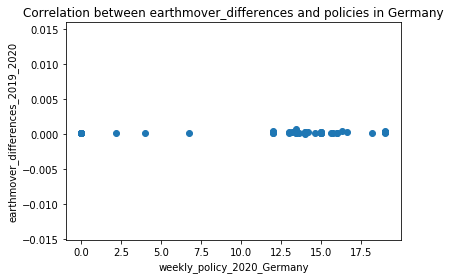

In [ ]:
#earthmover   
    
from scipy.stats import wasserstein_distance
earthmover_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(extracted_daily_2020)) :
    earthmover_differences.append(wasserstein_distance(extracted_daily_ratio_2019[i], extracted_daily_ratio_2020[i]))
    

#weekly_policy_2020_deutch=weekly_policy_2020_deutch.tolist()


#del weekly_policy_2020_deutch[:2]




from matplotlib import pyplot 
import matplotlib.pyplot as plt


plt.scatter(weekly_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



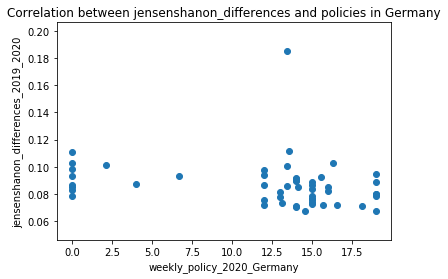

In [ ]:

#jensen shanon divergence

from scipy.spatial import distance
jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(extracted_daily_2020)) :
    jensenshanon_differences.append(distance.jensenshannon(extracted_daily_ratio_2019[i], extracted_daily_ratio_2020[i]))
    





#plot before normalizing
plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()



# Poland

In [ ]:



poland_policy_transposed =poland_policy.T 
poland_policy_transposed.reset_index(inplace=True)
poland_policy_transposed.dtypes

poland_policy_transposed = poland_policy_transposed.drop(labels=0, axis=0)
poland_policy_transposed.rename(columns=poland_policy_transposed.iloc[0])
#drop the first row
poland_policy_transposed=poland_policy_transposed.iloc[1:,:]

#headers = deutch_policy_transposed.iloc[0]
#deutch_policy_transposed  = pd.DataFrame(deutch_policy_transposed.values[1:], columns=headers)

poland_policy_transposed_FirstLastWeekDropped=poland_policy_transposed.iloc[4:361,:]


#preparing the independent variable
policy_2020_total_poland=poland_policy_transposed_FirstLastWeekDropped.iloc[:,9]
weekly_policy_2020_poland=policy_2020_total_poland.groupby(policy_2020_total_poland.index // 7).sum()
#average weekly independent variable
weekly_policy_2020_poland=weekly_policy_2020_poland/7




#making up the datetime structure 
revs_poland['dateInt']=revs_poland['y'].astype(str) + revs_poland['m'].astype(str).str.zfill(2)+ revs_poland['d'].astype(str).str.zfill(2)
revs_poland['Date'] = pd.to_datetime(revs_poland['dateInt'], format='%Y%m%d')      
revs_poland = revs_poland.reset_index()




revs_poland_2019=revs_poland.loc[(revs_poland['Date'] >= '2018-12-30 00:00:00') & (revs_poland['Date'] < '2020-01-01 00:00:00')]
revs_poland_2020=revs_poland.loc[(revs_poland['Date'] >= '2019-12-29 00:00:00') & (revs_poland['Date'] < '2021-01-01 00:00:00')]


revs_poland_2019 = revs_poland_2019.reset_index()
revs_poland_2020 = revs_poland_2020.reset_index()

del revs_poland_2019['index']
del revs_poland_2020['index']

del revs_poland_2019['level_0']
del revs_poland_2020['level_0']


#drop the first week of 2019 (up to 6th of 2019)
#Drop the first and last columns of 2019 and 2020

revs_poland_2019_FirstLastweekdroped=revs_poland_2019.loc[(revs_poland_2019['Date'] >= '2018-12-30 00:00:00') & (revs_poland_2019['Date'] < '2019-12-29 00:00:00')]
revs_poland_2020_FirstLastweekdroped=revs_poland_2020.loc[(revs_poland_2020['Date'] >= '2019-12-29 00:00:00') & (revs_poland_2020['Date'] < '2020-12-27 00:00:00')]



In [ ]:

#Now we make up the daily ratios  (24*7= 168) per week for 2020

#test
#print(revs_deutch_2019_FirstLastweekdroped.iloc[0,4])
hourly_poland_FirstLastweekdroped_2019=revs_poland_2019_FirstLastweekdroped.iloc[:,4]
hourly_poland_FirstLastweekdroped_2019 = hourly_poland_FirstLastweekdroped_2019.reset_index()

#group by and sum up every 168 cell (revision counts in 168 cells --->this we later use to devide daily counts and get daily ratios)
weekly_sum_2019=hourly_poland_FirstLastweekdroped_2019.groupby(hourly_poland_FirstLastweekdroped_2019.index // 168).sum()



last_check = 0
dfs = []
multiples_of_168=  [i for i in range (365*24) if i%168 == 0]


for i in range (len(multiples_of_168)-1) :
    dfs.append(revs_poland_2019_FirstLastweekdroped.iloc[multiples_of_168[i]:multiples_of_168[i+1]  ,:].reset_index())
    #last_check = ind
    
extracted_daily_2019=[]
    
for i in range (len(dfs)):
    
    extracted_daily_2019.append(dfs[i].iloc[:,5])
    

weekly_sum_2019_list=weekly_sum_2019['c'].tolist()

    
extracted_daily_ratio_2019=[]
for i in range (len(extracted_daily_2019)):
    extracted_daily_ratio_2019.append(extracted_daily_2019[i]/weekly_sum_2019_list[i])
    

In [ ]:
   
#print(revs_deutch_2019_FirstLastweekdroped.iloc[0,4])
hourly_poland_FirstLastweekdroped_2020=revs_poland_2020_FirstLastweekdroped.iloc[:,4]
hourly_poland_FirstLastweekdroped_2020 = hourly_poland_FirstLastweekdroped_2020.reset_index()

#group by and sum up every 24 cell (revision counts in 24 hours)
weekly_sum_2020=hourly_poland_FirstLastweekdroped_2020.groupby(hourly_poland_FirstLastweekdroped_2020.index // 168).sum()



last_check = 0
dffs = []
multiples_of_168=  [i for i in range (365*24) if i%168 == 0]


for i in range (len(multiples_of_168)-1) :
    dffs.append(revs_poland_2020_FirstLastweekdroped.iloc[multiples_of_168[i]:multiples_of_168[i+1]  ,:].reset_index())
    #last_check = ind
    
extracted_daily_2020=[]
    
for i in range (len(dffs)):
    
    extracted_daily_2020.append(dffs[i].iloc[:,5])
#del extracted_daily_2020[-1]
    

weekly_sum_2020_list=weekly_sum_2020['c'].tolist()

    
extracted_daily_ratio_2020=[]
for i in range (len(extracted_daily_2020)):
    extracted_daily_ratio_2020.append(extracted_daily_2020[i]/weekly_sum_2020_list[i])
    


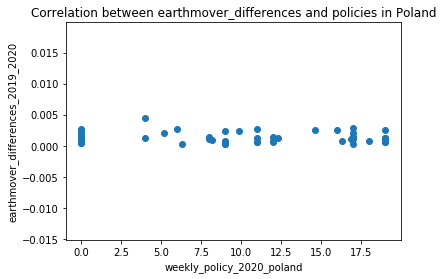

In [ ]:

 #earthmover   
    
from scipy.stats import wasserstein_distance
earthmover_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(extracted_daily_2020)) :
    earthmover_differences.append(wasserstein_distance(extracted_daily_ratio_2019[i], extracted_daily_ratio_2020[i]))
    

weekly_policy_2020_poland=weekly_policy_2020_poland.tolist()




#plot before normalizing
plt.scatter(weekly_policy_2020_poland, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()




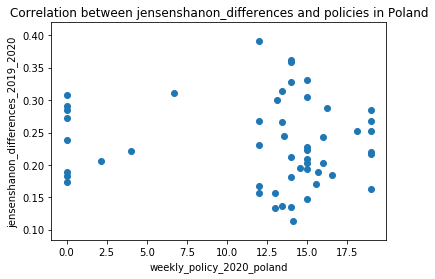

In [ ]:



#jensen shanon divergence

from scipy.spatial import distance
jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(extracted_daily_2020)) :
    jensenshanon_differences.append(distance.jensenshannon(extracted_daily_ratio_2019[i], extracted_daily_ratio_2020[i]))
    





#plot before normalizing
plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()





